# Intro to Visualization with R

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-R's-ggplot2-package" data-toc-modified-id="Introduction-to-R's-ggplot2-package-1">Introduction to R's ggplot2 package</a></span></li><li><span><a href="#Layers-and-Geoms" data-toc-modified-id="Layers-and-Geoms-2">Layers and Geoms</a></span></li><li><span><a href="#The-ggplot()-function" data-toc-modified-id="The-ggplot()-function-3">The ggplot() function</a></span></li><li><span><a href="#Associating-the-Data" data-toc-modified-id="Associating-the-Data-4">Associating the Data</a></span></li><li><span><a href="#What-are-aesthetics?" data-toc-modified-id="What-are-aesthetics?-5">What are aesthetics?</a></span></li><li><span><a href="#Adding-Geoms" data-toc-modified-id="Adding-Geoms-6">Adding Geoms</a></span></li><li><span><a href="#Geom-Aesthetics" data-toc-modified-id="Geom-Aesthetics-7">Geom Aesthetics</a></span></li><li><span><a href="#Manual-Aesthetics" data-toc-modified-id="Manual-Aesthetics-8">Manual Aesthetics</a></span></li><li><span><a href="#Labels" data-toc-modified-id="Labels-9">Labels</a></span></li><li><span><a href="#Extending-The-Grammar" data-toc-modified-id="Extending-The-Grammar-10">Extending The Grammar</a></span><ul class="toc-item"><li><span><a href="#Bar-Charts" data-toc-modified-id="Bar-Charts-10.1">Bar Charts</a></span></li></ul></li></ul></div>

### Introduction to R's ggplot2 package

The ggplot2 package is part of the tidyverse so it comes equipped with other data cleaning and processing tools.

This lesson will teach you the basic grammar required to create a plot. After you learn the underlying structure or “philosophy” of ggplot2, you can extend the logic to create many types of plots. 

### Layers and Geoms

The 'grammar of graphics' consist of:
* The `data` or the actual information you wish to visualize
* The `geometrics` describe the shapes that represent our data
* The `aesthetics`, or the visual attributes of the plot    

A key component to understand is that in ggplot2, geoms are “added” as layers to the original canvas which is just an empty plot with data associated to it.

### The ggplot() function

A ggplot visualization is a combination of layers that display information or add style to the final graph. You "add" these layers to a starting canvas, or ggplot object, with a `+` sign. Any arguments inside the `ggplot()` function call are inherited by the rest of the layers on the plot.

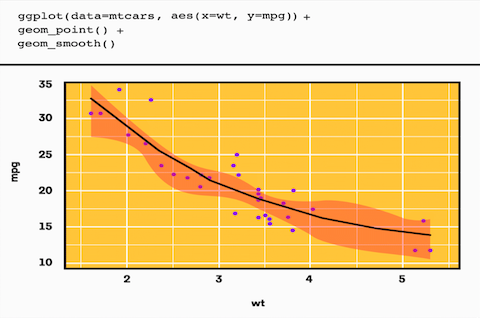

* Initially, a ggplot object is created as a blank canvas
```r
ggplot(data=mtcars)
```
* The aesthetics are then set inside the ggplot() function as an argument
```r
ggplot(data=mtcars, aes(x=wt, y=mpg)) 
```
* When two subsequent layers are added, a scatter plot and a line of best fit, both of those layers are mapped onto the canvas using the same data and scales.
```r
ggplot(data=mtcars, aes(x=wt, y=mpg)) +
geom_point() +
geom_smooth()
```

### Associating the Data

* Data is bound to a ggplot2 visualization by passing a data frame as the first argument in the `ggplot()` function call.    
* Because the data is bound at this step, this means that the rest of our layers, which are function calls we add with a `+` plus sign, all have access to the data frame and can use the column names as variables.




**Example**

Assume we have a data frame `sales` with the columns `cost` and `profit`. 
```r
viz <- ggplot(data=sales) +
       geom_point(aes(x=cost, y=profit))
viz # renders plot
```
* The ggplot object or canvas was initialized with the data frame `sales` assigned to it    
* The subsequent `geom_point` layer used the `cost` and `profit` columns to define the scales of the axes for that particular geom. 

### What are aesthetics?

Aesthetics are the instructions that determine the visual properties of the plot and its geometries.

There are two ways to set aesthetics, by manually specifying individual attributes or by providing aesthetic mappings. 

Aesthetic mappings “map” variables from the data frame to visual properties in the plot. Aesthetic mappings can be provided in two ways using the `aes()` mapping function:
* **At the canvas level:** All subsequent layers on the canvas will inherit the aesthetic mappings you define when you create a ggplot object with `ggplot()`.    
* **At the geom level:** Only that layer will use the aesthetic mappings you provide.

**Example**

Code that assigns `aes()' mappings for the `x` and `y` scales at the canvas level:
```r
ggplot(data=airquality, aes(x=Ozone, y=Temp) +
       geom_point() +
       geom_smooth()
```
* The aesthetic mapping is wrapped in the `aes()` aesthetic mapping function as an additional argument to `ggplot()`.
* Both of the subsequent geom layers, `geom_point()` and `geom_smooth()` use the scales defined inside the aesthetic mapping assigned at the canvas level.

You should set aesthetics for subsequent layers at the canvas level if all layers will share those aesthetics.

### Adding Geoms

Geometries or geoms are the shapes that represent our data. There are many types of geoms and more information can be found in the layers section of the [ggplot2 documentation](https://ggplot2.tidyverse.org/reference/).

The scatterplot geom, or `geom_point()`, represents each datum as a point on the grid. It is useful for graphing paired numerical data or to detect a correlation between two variables.

The following code will add a scatterplot layer to the visualization:
```r
viz <- ggplot(data=df, aes(x=col1, y=col2)) +
       geom_point()
```

Another layer, a line of best fit, is added to reveal patterns in the data. This layer, by nature, comes with a gray error band.
```r
viz <- ggplot(data=df, aes(x=col1, y=col2)) + 
       geom_point() +
       geom_smooth()
```
![](two_layers.png)

### Geom Aesthetics

Layers inherit the original aesthetic mappings of the canvas. It is also possible for individual layers to have their own mappings.    

For example, we could color code the points on the scatterplot by passing in an `aes()` aesthetic mapping with the color based on a data driven property.
```r
viz <- ggplot(data=airquality, aes(x=Ozone, y=Temp)) +
       geom_point(aes(color=Month)) +
       geom_smooth()
```

![](aes_example.png)

### Manual Aesthetics

A manual aesthetic change is based on visual preference and not data. For example, to make all the points on the scatter plot dark red:
```r
viz <- ggplot(data=airquality, aes(x=Ozone, y=Temp) +
       geom_point(color="darkred")
```
**Note:** We did not wrap the color argument inside `aes()` because we are manually setting that aesthetic.    

Read more in the `geom_point()` [layer documentation](https://ggplot2.tidyverse.org/reference/geom_point.html)

### Labels

The ggplot2 package automatically assigns the name of the variable corresponding to the different components on the plot as the initial label.

If you wish to customize your labels, you can add a `labs()` function call to your ggplot object. Inside the function call to `labs()` you can provide new labels for the `x` and `y` axes as well as a `title`, `subtitle`, or `caption`. You can check out the list of available label arguments in the `labs()` [documentation](https://ggplot2.tidyverse.org/reference/labs.html) here.

```r
viz <- ggplot(df, aes(x=rent, y=size_sqft)) +
       geom_point() +
       labs(title='Monthly Rent vs Apartment Size in Brooklyn, NY',
            subtitle='Data by StreetEasy(2017)',
            x='Monthly Rent ($)',
            y='Apartment Size (sq ft)')
```
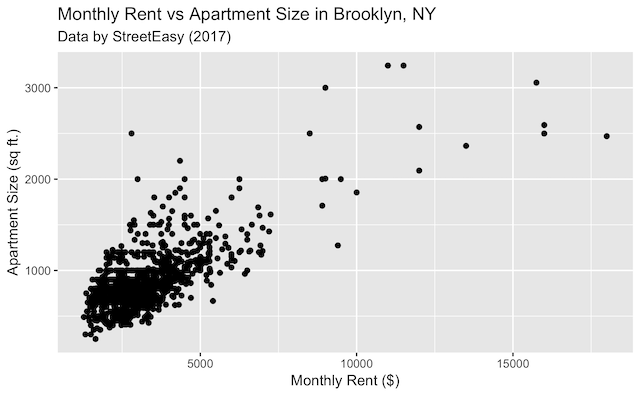

### Extending The Grammar

#### Bar Charts

Bar charts are great for showing the distribution of categorical data.

The `geom_bar()` layer adds a bar chart to the canvas. Typically when creating a bar chart, you assign an `aes()` aesthetic mapping with a single categorical value on the `x` axes and the `aes()` function will compute the count for each category and display the count values on the y axis.

```r
bar <- ggplot(books, aes(x=Language)) + geom_bar()
bar
ggsave("bar-example.png")
```
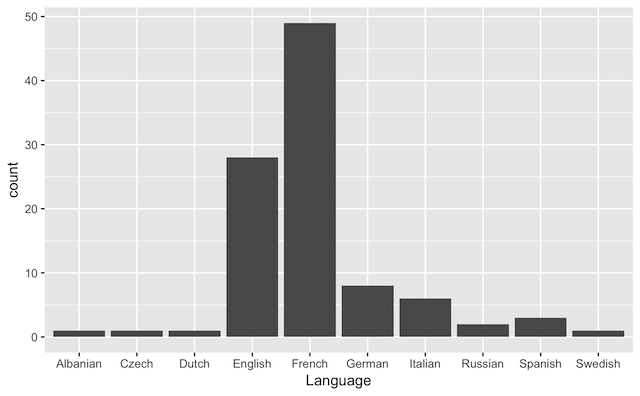

**Note:** The `ggsave()` function allows you to save visualizations as a local file with the name of your choice.